## Installing required python packages

In [1]:
!pip install streamlit medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 3.9 MB/s eta 0:00:00
  Created wheel for

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import medmnist
from medmnist import INFO, Evaluator

In [4]:
def download_dataset(data_flag):
  print(f"Dataset source information : MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

  download = True
  
  info = INFO[data_flag]

  DataClass = getattr(medmnist, info['python_class'])

  print('\nBreastMNIST')
  print(info['description'])

  # Downloading dataset
  train_dataset = DataClass(split='train', download=download)
  val_dataset = DataClass(split='val', download=download)
  test_dataset = DataClass(split='test', download=download)

  print('\nTraining Dataset:')
  print(train_dataset)
  # print(train_dataset.imgs.shape)
  if train_dataset.imgs.ndim == 3:
    print('Adding channel to images...')
    train_dataset.imgs = np.expand_dims(train_dataset.imgs, axis=-1)

  print('\nValidation Dataset:')
  print(val_dataset)
  # print(val_dataset.imgs.shape)
  if val_dataset.imgs.ndim == 3:
    print('Adding channel to images...')
    val_dataset.imgs = np.expand_dims(val_dataset.imgs, axis=-1)

  print('\nTesting Dataset:')
  print(test_dataset)
  # print(test_dataset.imgs.shape)
  if test_dataset.imgs.ndim == 3:
    print('Adding channel to images...')
    test_dataset.imgs = np.expand_dims(test_dataset.imgs, axis=-1)

  print('\nShapes of images:')
  print('Training: ', train_dataset.imgs.shape)
  print('Validation: ', val_dataset.imgs.shape)
  print('Testing: ', test_dataset.imgs.shape)

  return train_dataset, val_dataset, test_dataset

In [5]:
train_dataset, val_dataset, test_dataset = download_dataset('breastmnist')

Dataset source information : MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/

BreastMNIST
The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.


  0%|          | 0/559580 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz

Training Dataset:
Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0
Adding channel to images...

Validation Dataset:
Datas

## Pre-Processing

In [6]:
class_labels = ['Malignant',
                'Normal/Benign']

In [7]:
# Check missing images in the dataset
if len(train_dataset.imgs) != 546:
  print("WARNING: Missing images in training dataset.")
  print(f"Found {len(train_dataset.imgs)}, should be 546.")
else:
  print("SUCCESS: No missing images in training dataset.")

if len(val_dataset.imgs) != 78:
  print("WARNING: Missing images in validation dataset.")
  print(f"Found {len(val_dataset.imgs)}, should be 78.")
else:
  print("SUCCESS: No missing images in validation dataset.")

if len(test_dataset.imgs) != 156:
  print("WARNING: Missing images in testing dataset.")
  print(f"Found {len(train_dataset.imgs)}, should be 156.")
else:
  print("SUCCESS: No missing images in test dataset.")

SUCCESS: No missing images in training dataset.
SUCCESS: No missing images in validation dataset.
SUCCESS: No missing images in test dataset.


In [8]:
# Normalising images in the dataset
# Pixel values lie between 0-255, 
# division by 255 will scale the values between 0 and 1
train_dataset.imgs = train_dataset.imgs/255.0 
val_dataset.imgs = val_dataset.imgs/255.0
test_dataset.imgs = test_dataset.imgs/255.0

## Save and Load Models

In [9]:
# Function to SAVE and LOAD models

from pathlib import Path
from keras.models import model_from_json

def save_model(model, model_name):
  # Saving neural network structure
  model_structure = model.to_json()
  # Saving to file
  f = Path(f"{model_name}.json")
  f.write_text(model_structure)

  #save neural network's saved weights
  model.save_weights(f"{model_name}.h5")

def load_model(model_name):
  f = Path(f"{model_name}.json")
  model_structure = f.read_text()
  model = model_from_json(model_structure)
  model.load_weights(f"{model_name}.h5")
  return model

## Model Evaluation

In [10]:
# Function for Model Evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(true_labels, predicted_labels, predicted_probs, label_names):
  true_labels_1D = true_labels[:, 0]
  predicted_labels_1D = predicted_labels[:, 0]
  predicted_probs_1D = predicted_probs[:, 0]

  print(f"Accuracy : {accuracy_score(true_labels_1D, predicted_labels_1D)}")

  print(f"Precision : {precision_score(true_labels_1D, predicted_labels_1D)}")

  print(f"Recall : {recall_score(true_labels_1D, predicted_labels_1D)}")

  print(f"F1 Score: {f1_score(true_labels_1D, predicted_labels_1D)}")

  print(f"ROC AUC Score : {roc_auc_score(true_labels_1D, predicted_probs_1D)}")

  print("Classification report : ")
  print(classification_report(true_labels_1D, predicted_labels_1D, target_names=label_names))

  matrix = confusion_matrix(true_labels_1D, predicted_labels_1D)
  print("Confusion Matrix : ")
  # print(matrix)
  ConfusionMatrixDisplay(matrix, display_labels=label_names).plot(cmap=plt.cm.Blues)

## Visualisations

In [11]:
# Function to plot Accuracy and Loss of a model

def plot_acc_loss(model_history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), dpi=160)
  acc = model_history.history['accuracy']
  val_acc = model_history.history['val_accuracy']

  # Get number of epochs
  epochs = range(1, len(acc) + 1)

  # Plot training and validation accuracy per epoch
  ax1.plot(epochs, acc, label="Training acc")
  ax1.plot(epochs, val_acc, label="Validation acc")
  ax1.set_title('Training and validation accuracy')
  ax1.legend()

  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  ax2.plot(epochs, loss, label="Training loss")
  ax2.plot(epochs, val_loss, label="Validation loss")
  ax2.set_title('Training and validation loss')
  ax2.legend()
  # plt.show()

In [12]:
# Function to visualise a subset of the dataset
def visualise_subset(train_dataset):
  fig = plt.figure(figsize=(12, 10))
  for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_dataset.imgs[i], cmap=plt.get_cmap('gray'))
    plt.title(f"{class_labels[train_dataset.labels[i][0]]}")
  plt.show()

In [27]:
from tensorflow.keras.utils import plot_model

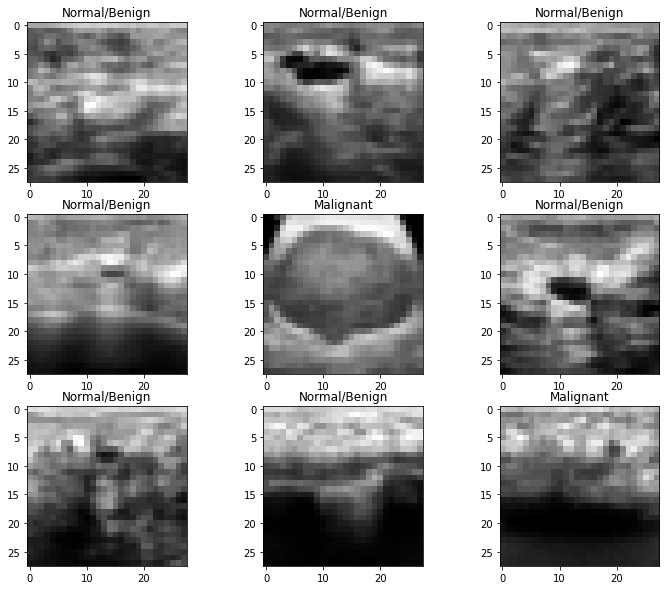

In [ ]:
visualise_subset(train_dataset)

## Data Augmentation

In [13]:
def augmented_data_visualisation(train_dataset):
  datagen = ImageDataGenerator(rotation_range=30)
  train_generator = datagen.flow(train_dataset.imgs,train_dataset.labels)
  plt.figure(figsize=(10,5))
  for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in train_generator:
      plt.imshow((x[0]/255),cmap='gray')
      plt.title('y={}'.format(y[0]))
      plt.axis('off')
      break
  plt.tight_layout()
  plt.show()

## Class Imbalance

In [14]:
# Class imbalance handling through calculation of class weights

from sklearn.utils import class_weight
import numpy as np

breast_class_weights = class_weight.compute_class_weight('balanced',
                                                         classes = np.unique(train_dataset.labels[:,0]),
                                                         y = train_dataset.labels[:, 0])

weights = { 0 : breast_class_weights[0], 1 : breast_class_weights[1] }
print(f"Class weights for imbalance {weights}")

Class weights for imbalance {0: 1.8571428571428572, 1: 0.6842105263157895}


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
print("Preprocessing and augmentation of images with Standardisation, Rotation and Horizontal Flips..")
datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True)

Preprocessing and augmentation of images with Standardisation, Rotation and Horizontal Flips..


In [17]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]

# Model 1 : Xception

In [18]:
# MODEL 1 Training existing DNN 
# XCEPTION

import tensorflow as tf
from keras.layers import Input,Dense,Conv2D,Add
from keras.layers import SeparableConv2D,ReLU
from keras.layers import BatchNormalization,MaxPool2D
from keras.layers import GlobalAvgPool2D
from keras import Model

In [19]:
# Conv-Batch Norm block
def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters, 
               kernel_size = kernel_size, 
               strides=strides, 
               padding = 'same', 
               use_bias = False)(x)
    x = BatchNormalization()(x)
    return x

In [20]:
# SeparableConv-Batch Norm block
def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters=filters, 
                        kernel_size = kernel_size, 
                        strides=strides, 
                        padding = 'same', 
                        use_bias = False)(x)
    x = BatchNormalization()(x)
    return x

In [21]:
# Entry Flow
def entry_flow(x):
    x = conv_bn(x, filters =32, kernel_size =3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters =64, kernel_size =3, strides=1)
    tensor = ReLU()(x)
    
    x = sep_bn(tensor, filters = 128, kernel_size =3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 128, kernel_size =3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=128, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=256, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=728, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    return x

In [22]:
# Middle Flow
def middle_flow(tensor):
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])   
    return tensor

In [23]:
# Exit Flow
def exit_flow(tensor):    
    x = ReLU()(tensor)
    x = sep_bn(x, filters = 728,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 1024,  kernel_size=3)
    x = MaxPool2D(pool_size = 3, strides = 2, padding ='same')(x)
    
    tensor = conv_bn(tensor, filters =1024, kernel_size=1, strides =2)
    x = Add()([tensor,x])
    
    x = sep_bn(x, filters = 1536,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 2048,  kernel_size=3)
    x = GlobalAvgPool2D()(x)
    
    x = Dense(units = 1, activation = 'sigmoid')(x)

    return x

In [24]:
# Model Code
input = Input(shape = (28,28,1))
x = entry_flow(input)
x = middle_flow(x)
output = exit_flow(x)

model = Model (inputs=input, outputs=output)

In [25]:
# Printing model summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   288         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 14, 14, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 14, 14, 32)   0           ['batch_normalization[0][0]']

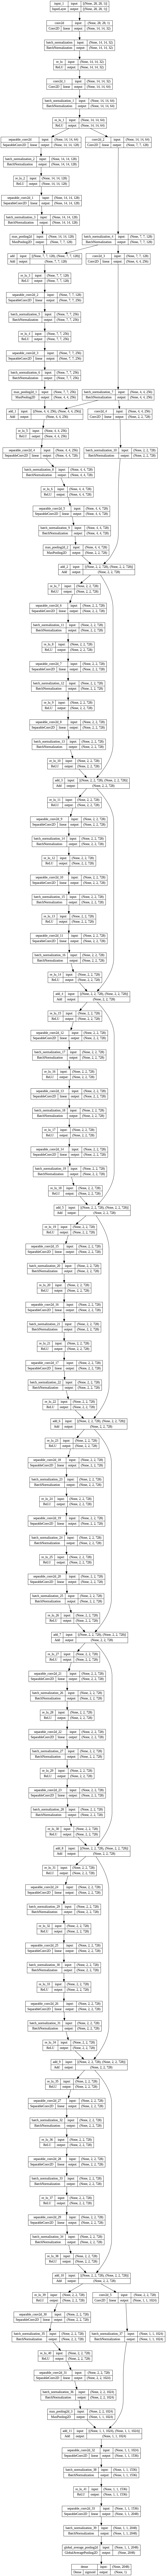

In [28]:
# Plotting model architecture
plot_model(model, to_file='xception_model.png', show_shapes=True, show_layer_activations=True)

In [29]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', ])

In [30]:
# Training the model
history = model.fit(datagen.flow(train_dataset.imgs, train_dataset.labels),
                    epochs=100,
                    callbacks=my_callbacks,
                    validation_data=(val_dataset.imgs, val_dataset.labels),
                    shuffle=True,
                    class_weight=weights)

Epoch 1/100
18/18 [==============================] - 40s 211ms/step - loss: 0.9484 - accuracy: 0.5311 - val_loss: 0.6679 - val_accuracy: 0.7308
Epoch 2/100
18/18 [==============================] - 1s 68ms/step - loss: 0.6222 - accuracy: 0.6465 - val_loss: 0.6691 - val_accuracy: 0.7308
Epoch 3/100
18/18 [==============================] - 1s 67ms/step - loss: 0.6136 - accuracy: 0.6520 - val_loss: 0.6569 - val_accuracy: 0.7308
Epoch 4/100
18/18 [==============================] - 1s 65ms/step - loss: 0.5452 - accuracy: 0.7326 - val_loss: 0.6445 - val_accuracy: 0.7308
Epoch 5/100
18/18 [==============================] - 1s 74ms/step - loss: 0.5160 - accuracy: 0.7289 - val_loss: 0.6292 - val_accuracy: 0.7308
Epoch 6/100
18/18 [==============================] - 1s 75ms/step - loss: 0.4950 - accuracy: 0.7509 - val_loss: 0.6253 - val_accuracy: 0.7308
Epoch 7/100
18/18 [==============================] - 1s 75ms/step - loss: 0.4587 - accuracy: 0.7930 - val_loss: 0.6120 - val_accuracy: 0.7308
Epoc

In [31]:
save_model(model, "xception")

In [32]:
# Predictions on test dataset
test_predict_prob = model.predict(test_dataset.imgs, verbose=0)
test_predict_labels = np.where(test_predict_prob > 0.5, 1, 0)

Accuracy : 0.6794871794871795
Precision : 0.9444444444444444
Recall : 0.5964912280701754
F1 Score: 0.7311827956989247
ROC AUC Score : 0.9045530492898914
Classification report : 
               precision    recall  f1-score   support

    Malignant       0.45      0.90      0.60        42
Normal/Benign       0.94      0.60      0.73       114

     accuracy                           0.68       156
    macro avg       0.70      0.75      0.67       156
 weighted avg       0.81      0.68      0.70       156

Confusion Matrix : 


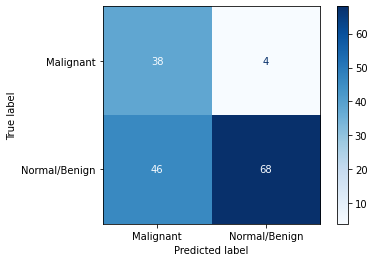

In [33]:
# Model evaluation
evaluate_model(test_dataset.labels, test_predict_labels, test_predict_prob, ["Malignant", "Normal/Benign"])

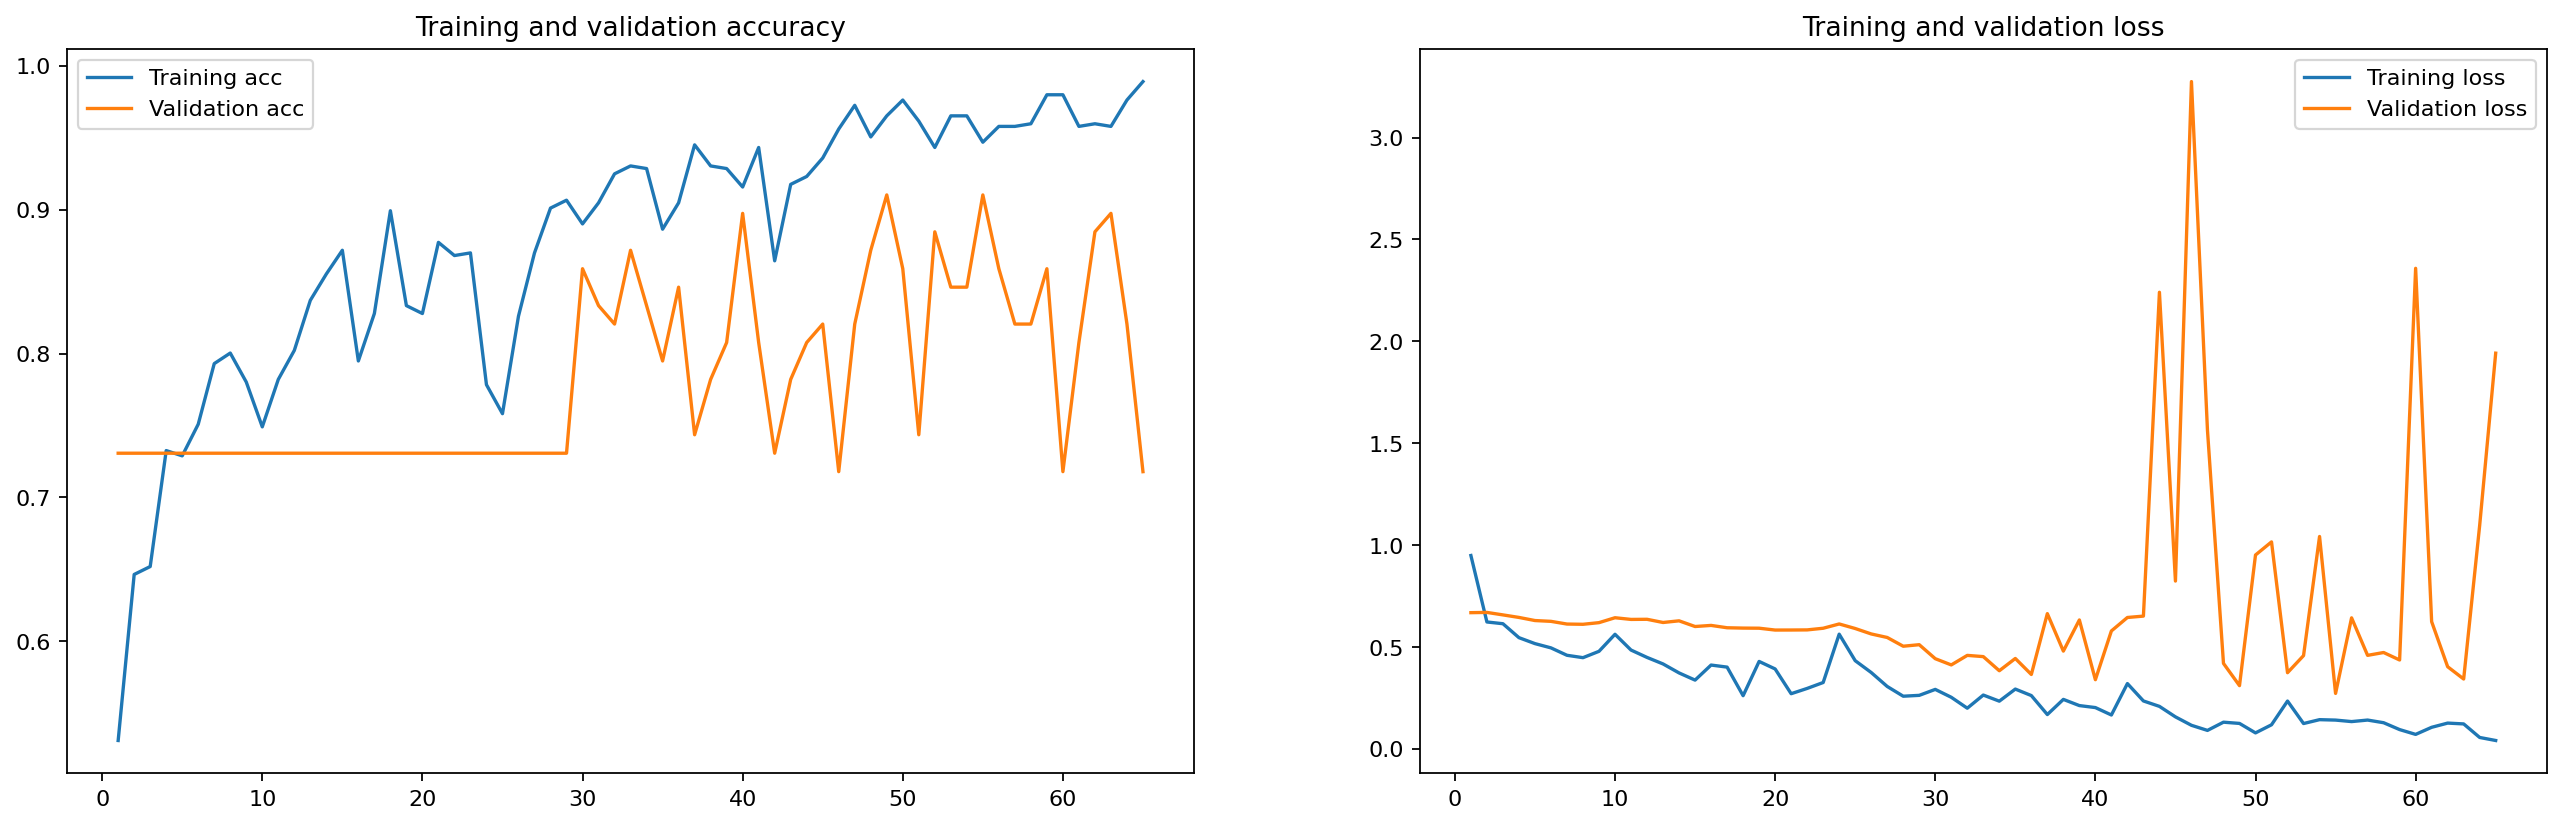

In [34]:
# Plotting accuracy and loss
plot_acc_loss(history)

# Model 2 :  Own Architecture

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import plot_model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding="same"))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1),padding="same"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(datagen.flow(train_dataset.imgs, train_dataset.labels),
                    epochs=100,
                    callbacks=my_callbacks,
                    validation_data=(val_dataset.imgs, val_dataset.labels),
                    shuffle=True,
                    class_weight=weights)

Epoch 1/100
18/18 [==============================] - 13s 41ms/step - loss: 0.6981 - accuracy: 0.6905 - val_loss: 0.6451 - val_accuracy: 0.7179
Epoch 2/100
18/18 [==============================] - 0s 17ms/step - loss: 0.6411 - accuracy: 0.6868 - val_loss: 0.6620 - val_accuracy: 0.6026
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 0.6289 - accuracy: 0.6612 - val_loss: 0.6194 - val_accuracy: 0.6282
Epoch 4/100
18/18 [==============================] - 0s 16ms/step - loss: 0.6121 - accuracy: 0.6538 - val_loss: 0.6540 - val_accuracy: 0.5513
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 0.6057 - accuracy: 0.6319 - val_loss: 0.5143 - val_accuracy: 0.7179
Epoch 6/100
18/18 [==============================] - 0s 17ms/step - loss: 0.5869 - accuracy: 0.6868 - val_loss: 0.4905 - val_accuracy: 0.7692
Epoch 7/100
18/18 [==============================] - 0s 15ms/step - loss: 0.5977 - accuracy: 0.6447 - val_loss: 0.4645 - val_accuracy: 0.8077
Epoch

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 128)      0         
 2D)                                                    

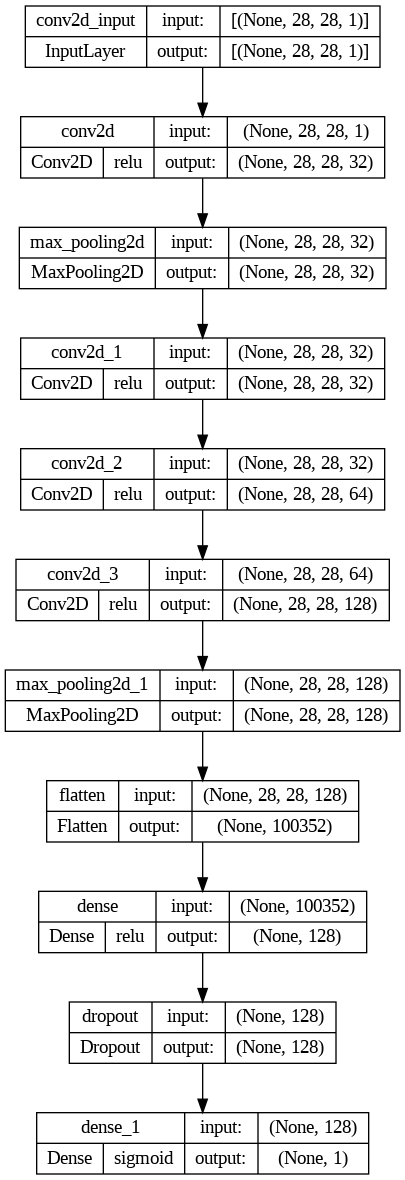

In [ ]:
# Plotting model architecture
plot_model(model, to_file='model_from_scratch_breast.png', show_shapes=True, show_layer_activations=True)

In [ ]:
save_model(model, "model_from_scratch_breast")

In [ ]:
# Predictions on test dataset
test_predict_prob = model.predict(test_dataset.imgs, verbose=0)
test_predict_labels = np.where(test_predict_prob > 0.5, 1, 0)

Accuracy : 0.9102564102564102
Precision : 0.9545454545454546
Recall : 0.9210526315789473
F1 Score: 0.9375
ROC AUC Score : 0.9310776942355888
Classification report : 
               precision    recall  f1-score   support

    Malignant       0.80      0.88      0.84        42
Normal/Benign       0.95      0.92      0.94       114

     accuracy                           0.91       156
    macro avg       0.88      0.90      0.89       156
 weighted avg       0.91      0.91      0.91       156

Confusion Matrix : 


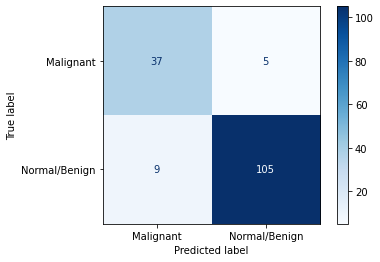

In [ ]:
# Model evaluation
evaluate_model(test_dataset.labels, test_predict_labels, test_predict_prob, ["Malignant", "Normal/Benign"])

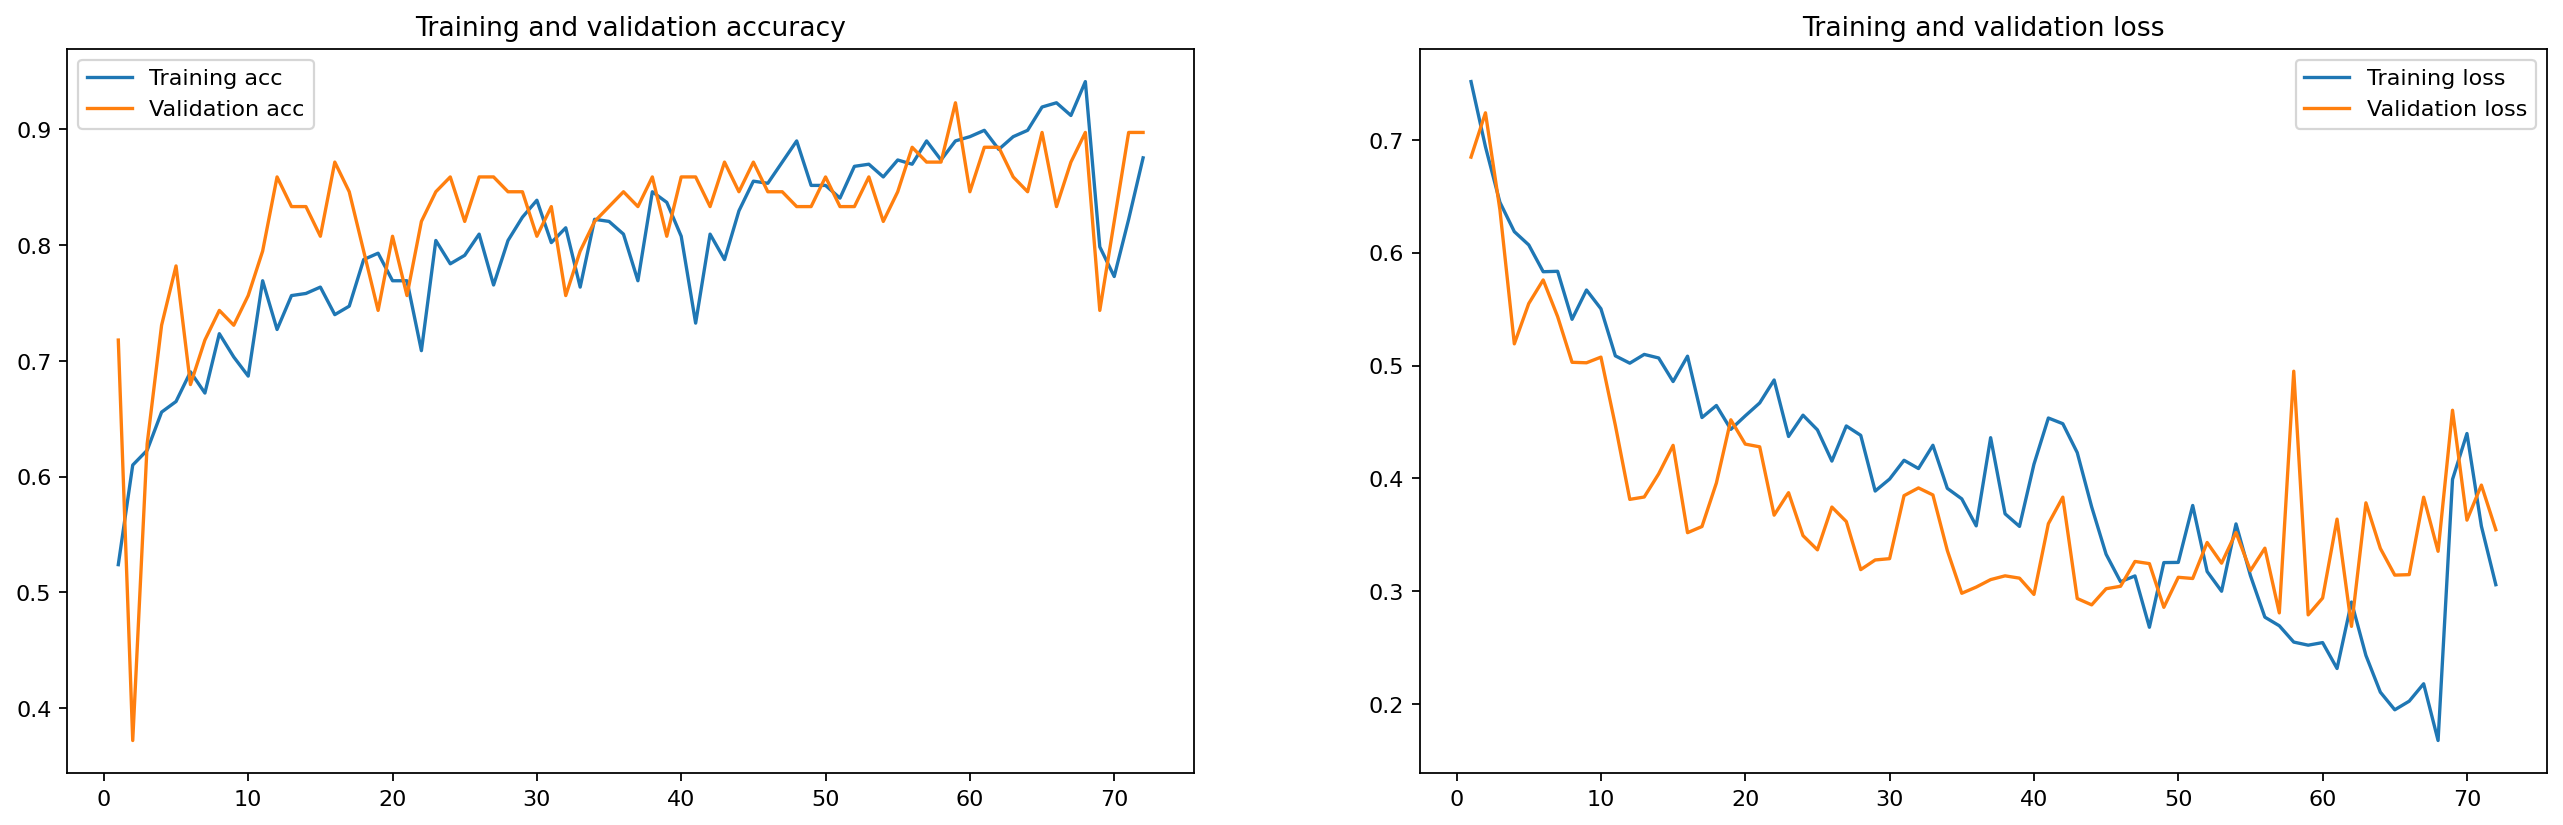

In [ ]:
# Plotting accuracy and loss
plot_acc_loss(history)